# Chapter 2. DuckDB w/ Polars

- https://learning.oreilly.com/library/view/duckdb-up-and/9781098159689/ch02.html

## SELECT ROWS, COLS

In [2]:
import polars as pl

df = pl.DataFrame(
    {
        "Model": [
            "Camry",
            "Corolla",
            "RAV4",
            "Mustang",
            "F-150",
            "Escape",
            "Golf",
            "Tiguan",
        ],
        "Year": [1982, 1966, 1994, 1964, 1975, 2000, 1974, 2007],
        "Engine_Min": [2.5, 1.8, 2.0, 2.3, 2.7, 1.5, 1.0, 1.4],
        "Engine_Max": [3.5, 2.0, 2.5, 5.0, 5.0, 2.5, 2.0, 2.0],
        "AWD": [False, False, True, False, True, True, True, True],
        "Company": [
            "Toyota",
            "Toyota",
            "Toyota",
            "Ford",
            "Ford",
            "Ford",
            "Volkswagen",
            "Volkswagen",
        ],
    }
)
df

Model,Year,Engine_Min,Engine_Max,AWD,Company
str,i64,f64,f64,bool,str
"""Camry""",1982,2.5,3.5,false,"""Toyota"""
"""Corolla""",1966,1.8,2.0,false,"""Toyota"""
"""RAV4""",1994,2.0,2.5,true,"""Toyota"""
"""Mustang""",1964,2.3,5.0,false,"""Ford"""
"""F-150""",1975,2.7,5.0,true,"""Ford"""
"""Escape""",2000,1.5,2.5,true,"""Ford"""
"""Golf""",1974,1.0,2.0,true,"""Volkswagen"""
"""Tiguan""",2007,1.4,2.0,true,"""Volkswagen"""


In [10]:
df.columns

['Model', 'Year', 'Engine_Min', 'Engine_Max', 'AWD', 'Company']

In [11]:
df.rows()

[('Camry', 1982, 2.5, 3.5, False, 'Toyota'),
 ('Corolla', 1966, 1.8, 2.0, False, 'Toyota'),
 ('RAV4', 1994, 2.0, 2.5, True, 'Toyota'),
 ('Mustang', 1964, 2.3, 5.0, False, 'Ford'),
 ('F-150', 1975, 2.7, 5.0, True, 'Ford'),
 ('Escape', 2000, 1.5, 2.5, True, 'Ford'),
 ('Golf', 1974, 1.0, 2.0, True, 'Volkswagen'),
 ('Tiguan', 2007, 1.4, 2.0, True, 'Volkswagen')]

In [16]:
df.select(["Model", "Company"])

Model,Company
str,str
"""Camry""","""Toyota"""
"""Corolla""","""Toyota"""
"""RAV4""","""Toyota"""
"""Mustang""","""Ford"""
"""F-150""","""Ford"""
"""Escape""","""Ford"""
"""Golf""","""Volkswagen"""
"""Tiguan""","""Volkswagen"""


In [18]:
# get me all string type columns
df.select(pl.col(pl.Utf8))

Model,Company
str,str
"""Camry""","""Toyota"""
"""Corolla""","""Toyota"""
"""RAV4""","""Toyota"""
"""Mustang""","""Ford"""
"""F-150""","""Ford"""
"""Escape""","""Ford"""
"""Golf""","""Volkswagen"""
"""Tiguan""","""Volkswagen"""


In [19]:
df

Model,Year,Engine_Min,Engine_Max,AWD,Company
str,i64,f64,f64,bool,str
"""Camry""",1982,2.5,3.5,false,"""Toyota"""
"""Corolla""",1966,1.8,2.0,false,"""Toyota"""
"""RAV4""",1994,2.0,2.5,true,"""Toyota"""
"""Mustang""",1964,2.3,5.0,false,"""Ford"""
"""F-150""",1975,2.7,5.0,true,"""Ford"""
"""Escape""",2000,1.5,2.5,true,"""Ford"""
"""Golf""",1974,1.0,2.0,true,"""Volkswagen"""
"""Tiguan""",2007,1.4,2.0,true,"""Volkswagen"""


In [26]:
df.select(
    pl.col(["Year", "Model", "Engine_Max"]).sort_by(
        ["Engine_Max", "Year"], descending=[False, True]
    )
)

Year,Model,Engine_Max
i64,str,f64
2007,"""Tiguan""",2.0
1974,"""Golf""",2.0
1966,"""Corolla""",2.0
2000,"""Escape""",2.5
1994,"""RAV4""",2.5
1982,"""Camry""",3.5
1975,"""F-150""",5.0
1964,"""Mustang""",5.0


In [29]:
df.select([pl.col(pl.Utf8), "Year"])

Model,Company,Year
str,str,i64
"""Camry""","""Toyota""",1982
"""Corolla""","""Toyota""",1966
"""RAV4""","""Toyota""",1994
"""Mustang""","""Ford""",1964
"""F-150""","""Ford""",1975
"""Escape""","""Ford""",2000
"""Golf""","""Volkswagen""",1974
"""Tiguan""","""Volkswagen""",2007


In [30]:
df

Model,Year,Engine_Min,Engine_Max,AWD,Company
str,i64,f64,f64,bool,str
"""Camry""",1982,2.5,3.5,false,"""Toyota"""
"""Corolla""",1966,1.8,2.0,false,"""Toyota"""
"""RAV4""",1994,2.0,2.5,true,"""Toyota"""
"""Mustang""",1964,2.3,5.0,false,"""Ford"""
"""F-150""",1975,2.7,5.0,true,"""Ford"""
"""Escape""",2000,1.5,2.5,true,"""Ford"""
"""Golf""",1974,1.0,2.0,true,"""Volkswagen"""
"""Tiguan""",2007,1.4,2.0,true,"""Volkswagen"""


In [31]:
# select first row
df.row(0)

('Camry', 1982, 2.5, 3.5, False, 'Toyota')

In [32]:
df[:3]

Model,Year,Engine_Min,Engine_Max,AWD,Company
str,i64,f64,f64,bool,str
"""Camry""",1982,2.5,3.5,false,"""Toyota"""
"""Corolla""",1966,1.8,2.0,false,"""Toyota"""
"""RAV4""",1994,2.0,2.5,true,"""Toyota"""


In [33]:
df.head()

Model,Year,Engine_Min,Engine_Max,AWD,Company
str,i64,f64,f64,bool,str
"""Camry""",1982,2.5,3.5,false,"""Toyota"""
"""Corolla""",1966,1.8,2.0,false,"""Toyota"""
"""RAV4""",1994,2.0,2.5,true,"""Toyota"""
"""Mustang""",1964,2.3,5.0,false,"""Ford"""
"""F-150""",1975,2.7,5.0,true,"""Ford"""


In [34]:
df.tail()

Model,Year,Engine_Min,Engine_Max,AWD,Company
str,i64,f64,f64,bool,str
"""Mustang""",1964,2.3,5.0,false,"""Ford"""
"""F-150""",1975,2.7,5.0,true,"""Ford"""
"""Escape""",2000,1.5,2.5,true,"""Ford"""
"""Golf""",1974,1.0,2.0,true,"""Volkswagen"""
"""Tiguan""",2007,1.4,2.0,true,"""Volkswagen"""


In [49]:
# use multi conditions
df.filter((pl.col("Company") == "Toyota") & (pl.col("Year") == 1982))

Model,Year,Engine_Min,Engine_Max,AWD,Company
str,i64,f64,f64,bool,str
"""Camry""",1982,2.5,3.5,false,"""Toyota"""


In [54]:
df.filter(~(pl.col("Company") == "Toyota"))

Model,Year,Engine_Min,Engine_Max,AWD,Company
str,i64,f64,f64,bool,str
"""Mustang""",1964,2.3,5.0,false,"""Ford"""
"""F-150""",1975,2.7,5.0,true,"""Ford"""
"""Escape""",2000,1.5,2.5,true,"""Ford"""
"""Golf""",1974,1.0,2.0,true,"""Volkswagen"""
"""Tiguan""",2007,1.4,2.0,true,"""Volkswagen"""


In [59]:
# select rows followed by columns
df.filter(pl.col("Company") == "Toyota").select(["Model", "Year"])

Model,Year
str,i64
"""Camry""",1982
"""Corolla""",1966
"""RAV4""",1994


## LAZY EVALUATION

In [60]:
# laod csv w/ lazy evaluation
import polars as pl

q = pl.scan_csv("../data/flights.csv")
type(q)

polars.lazyframe.frame.LazyFrame

In [65]:
df = pl.read_csv("../data/flights.csv")
type(df)

polars.dataframe.frame.DataFrame

In [66]:
df.head()

YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
i64,i64,i64,i64,str,i64,str,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,i64,i64,i64,i64,i64
2015,1,1,4,"""AS""",98,"""N407AS""","""ANC""","""SEA""",5,2354,-11,21,15,205,194,169,1448,404,4,430,408,-22,0,0,null,null,null,null,null,null
2015,1,1,4,"""AA""",2336,"""N3KUAA""","""LAX""","""PBI""",10,2,-8,12,14,280,279,263,2330,737,4,750,741,-9,0,0,null,null,null,null,null,null
2015,1,1,4,"""US""",840,"""N171US""","""SFO""","""CLT""",20,18,-2,16,34,286,293,266,2296,800,11,806,811,5,0,0,null,null,null,null,null,null
2015,1,1,4,"""AA""",258,"""N3HYAA""","""LAX""","""MIA""",20,15,-5,15,30,285,281,258,2342,748,8,805,756,-9,0,0,null,null,null,null,null,null
2015,1,1,4,"""AS""",135,"""N527AS""","""SEA""","""ANC""",25,24,-1,11,35,235,215,199,1448,254,5,320,259,-21,0,0,null,null,null,null,null,null


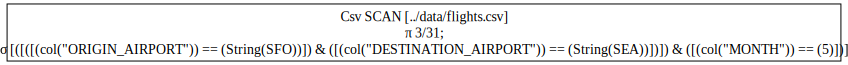

In [73]:
q = pl.scan_csv("../data/flights.csv")
q = q.select(["MONTH", "ORIGIN_AIRPORT", "DESTINATION_AIRPORT"])
q = q.filter(
    (pl.col("MONTH") == 5)
    & (pl.col("ORIGIN_AIRPORT") == "SFO")
    & (pl.col("DESTINATION_AIRPORT") == "SEA")
)
q.show_graph(optimized=True)

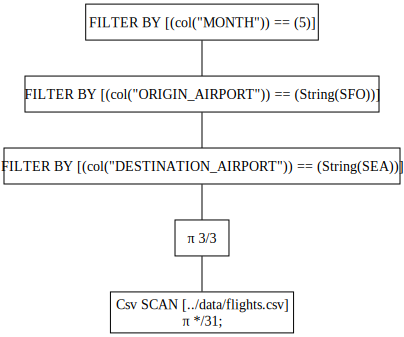

In [72]:
# no optimization
q = (
    pl.scan_csv("../data/flights.csv")
    .select(["MONTH", "ORIGIN_AIRPORT", "DESTINATION_AIRPORT"])
    .filter(
        (pl.col("MONTH") == 5)
        & (pl.col("ORIGIN_AIRPORT") == "SFO")
        & (pl.col("DESTINATION_AIRPORT") == "SEA")
    )
)

q.show_graph(optimized=False)

In [74]:
q.collect()

MONTH,ORIGIN_AIRPORT,DESTINATION_AIRPORT
i64,str,str
5,"""SFO""","""SEA"""
5,"""SFO""","""SEA"""
5,"""SFO""","""SEA"""
5,"""SFO""","""SEA"""
5,"""SFO""","""SEA"""
…,…,…
5,"""SFO""","""SEA"""
5,"""SFO""","""SEA"""
5,"""SFO""","""SEA"""


### EXPLICIT EVALUATION

In [76]:
df = (
    pl.read_csv("../data/flights.csv")
    .select(["MONTH", "ORIGIN_AIRPORT", "DESTINATION_AIRPORT"])
    .filter(
        (pl.col("MONTH") == 5)
        & (pl.col("ORIGIN_AIRPORT") == "SFO")
        & (pl.col("DESTINATION_AIRPORT") == "SEA")
    )
)
df

MONTH,ORIGIN_AIRPORT,DESTINATION_AIRPORT
i64,str,str
5,"""SFO""","""SEA"""
5,"""SFO""","""SEA"""
5,"""SFO""","""SEA"""
5,"""SFO""","""SEA"""
5,"""SFO""","""SEA"""
…,…,…
5,"""SFO""","""SEA"""
5,"""SFO""","""SEA"""
5,"""SFO""","""SEA"""


In [77]:
q = (
    pl.read_csv("../data/flights.csv")
    .lazy()
    .select(["MONTH", "ORIGIN_AIRPORT", "DESTINATION_AIRPORT"])
    .filter(
        (pl.col("MONTH") == 5)
        & (pl.col("ORIGIN_AIRPORT") == "SFO")
        & (pl.col("DESTINATION_AIRPORT") == "SEA")
    )
)

df = q.collect()
display(df)

MONTH,ORIGIN_AIRPORT,DESTINATION_AIRPORT
i64,str,str
5,"""SFO""","""SEA"""
5,"""SFO""","""SEA"""
5,"""SFO""","""SEA"""
5,"""SFO""","""SEA"""
5,"""SFO""","""SEA"""
…,…,…
5,"""SFO""","""SEA"""
5,"""SFO""","""SEA"""
5,"""SFO""","""SEA"""


## POLARS w/ DUCKDB

In [78]:
import polars as pl

df = pl.DataFrame(
    {
        "Model": [
            "Camry",
            "Corolla",
            "RAV4",
            "Mustang",
            "F-150",
            "Escape",
            "Golf",
            "Tiguan",
        ],
        "Year": [1982, 1966, 1994, 1964, 1975, 2000, 1974, 2007],
        "Engine_Min": [2.5, 1.8, 2.0, 2.3, 2.7, 1.5, 1.0, 1.4],
        "Engine_Max": [3.5, 2.0, 2.5, 5.0, 5.0, 2.5, 2.0, 2.0],
        "AWD": [False, False, True, False, True, True, True, True],
        "Company": [
            "Toyota",
            "Toyota",
            "Toyota",
            "Ford",
            "Ford",
            "Ford",
            "Volkswagen",
            "Volkswagen",
        ],
    }
)

In [79]:
import duckdb

result = duckdb.sql(
    """
SELECT *
FROM df
                    """
)

result

┌─────────┬───────┬────────────┬────────────┬─────────┬────────────┐
│  Model  │ Year  │ Engine_Min │ Engine_Max │   AWD   │  Company   │
│ varchar │ int64 │   double   │   double   │ boolean │  varchar   │
├─────────┼───────┼────────────┼────────────┼─────────┼────────────┤
│ Camry   │  1982 │        2.5 │        3.5 │ false   │ Toyota     │
│ Corolla │  1966 │        1.8 │        2.0 │ false   │ Toyota     │
│ RAV4    │  1994 │        2.0 │        2.5 │ true    │ Toyota     │
│ Mustang │  1964 │        2.3 │        5.0 │ false   │ Ford       │
│ F-150   │  1975 │        2.7 │        5.0 │ true    │ Ford       │
│ Escape  │  2000 │        1.5 │        2.5 │ true    │ Ford       │
│ Golf    │  1974 │        1.0 │        2.0 │ true    │ Volkswagen │
│ Tiguan  │  2007 │        1.4 │        2.0 │ true    │ Volkswagen │
└─────────┴───────┴────────────┴────────────┴─────────┴────────────┘

In [80]:
result.pl()

Model,Year,Engine_Min,Engine_Max,AWD,Company
str,i64,f64,f64,bool,str
"""Camry""",1982,2.5,3.5,false,"""Toyota"""
"""Corolla""",1966,1.8,2.0,false,"""Toyota"""
"""RAV4""",1994,2.0,2.5,true,"""Toyota"""
"""Mustang""",1964,2.3,5.0,false,"""Ford"""
"""F-150""",1975,2.7,5.0,true,"""Ford"""
"""Escape""",2000,1.5,2.5,true,"""Ford"""
"""Golf""",1974,1.0,2.0,true,"""Volkswagen"""
"""Tiguan""",2007,1.4,2.0,true,"""Volkswagen"""


In [81]:
result.describe()

┌─────────┬─────────┬────────────────────┬────────────────────┬───────────────────┬─────────┬────────────┐
│  aggr   │  Model  │        Year        │     Engine_Min     │    Engine_Max     │   AWD   │  Company   │
│ varchar │ varchar │       double       │       double       │      double       │ varchar │  varchar   │
├─────────┼─────────┼────────────────────┼────────────────────┼───────────────────┼─────────┼────────────┤
│ count   │ 8       │                8.0 │                8.0 │               8.0 │ 8       │ 8          │
│ mean    │ NULL    │            1982.75 │ 1.9000000000000001 │            3.0625 │ NULL    │ NULL       │
│ stddev  │ NULL    │ 15.953056133543761 │ 0.5855400437691198 │ 1.293872923766914 │ NULL    │ NULL       │
│ min     │ Camry   │             1964.0 │                1.0 │               2.0 │ false   │ Ford       │
│ max     │ Tiguan  │             2007.0 │                2.7 │               5.0 │ true    │ Volkswagen │
│ median  │ NULL    │             197

In [83]:
result.order("Year")

┌─────────┬───────┬────────────┬────────────┬─────────┬────────────┐
│  Model  │ Year  │ Engine_Min │ Engine_Max │   AWD   │  Company   │
│ varchar │ int64 │   double   │   double   │ boolean │  varchar   │
├─────────┼───────┼────────────┼────────────┼─────────┼────────────┤
│ Mustang │  1964 │        2.3 │        5.0 │ false   │ Ford       │
│ Corolla │  1966 │        1.8 │        2.0 │ false   │ Toyota     │
│ Golf    │  1974 │        1.0 │        2.0 │ true    │ Volkswagen │
│ F-150   │  1975 │        2.7 │        5.0 │ true    │ Ford       │
│ Camry   │  1982 │        2.5 │        3.5 │ false   │ Toyota     │
│ RAV4    │  1994 │        2.0 │        2.5 │ true    │ Toyota     │
│ Escape  │  2000 │        1.5 │        2.5 │ true    │ Ford       │
│ Tiguan  │  2007 │        1.4 │        2.0 │ true    │ Volkswagen │
└─────────┴───────┴────────────┴────────────┴─────────┴────────────┘

In [87]:
result.apply("min", "Year")

┌─────────────┐
│ min("Year") │
│    int64    │
├─────────────┤
│        1964 │
└─────────────┘

In [90]:
df

Model,Year,Engine_Min,Engine_Max,AWD,Company
str,i64,f64,f64,bool,str
"""Camry""",1982,2.5,3.5,false,"""Toyota"""
"""Corolla""",1966,1.8,2.0,false,"""Toyota"""
"""RAV4""",1994,2.0,2.5,true,"""Toyota"""
"""Mustang""",1964,2.3,5.0,false,"""Ford"""
"""F-150""",1975,2.7,5.0,true,"""Ford"""
"""Escape""",2000,1.5,2.5,true,"""Ford"""
"""Golf""",1974,1.0,2.0,true,"""Volkswagen"""
"""Tiguan""",2007,1.4,2.0,true,"""Volkswagen"""


In [88]:
duckdb.sql(
    """
SELECT Company, Model
FROM df
ORDER BY Company, Model
"""
)

┌────────────┬─────────┐
│  Company   │  Model  │
│  varchar   │ varchar │
├────────────┼─────────┤
│ Ford       │ Escape  │
│ Ford       │ F-150   │
│ Ford       │ Mustang │
│ Toyota     │ Camry   │
│ Toyota     │ Corolla │
│ Toyota     │ RAV4    │
│ Volkswagen │ Golf    │
│ Volkswagen │ Tiguan  │
└────────────┴─────────┘

In [94]:
duckdb.sql(
    """
SELECT Company, count(Model) as count
FROM df
GROUP BY Company
"""
).pl()

Company,count
str,i64
"""Toyota""",3
"""Volkswagen""",2
"""Ford""",3


## DUCKDB PY RELATION OBJECT

In [96]:
import duckdb

conn = duckdb.connect()

In [99]:
conn.execute(
    """
CREATE TABLE customers(
             customer_id INTEGER PRIMARY KEY,
             name STRING
             )
"""
)

CatalogException: Catalog Error: Table with name "customers" already exists!

In [100]:
conn.execute(
    """
CREATE TABLE products
(product_id INTEGER PRIMARY KEY,
             product_name STRING)"""
)

In [101]:
conn.execute(
    """
CREATE TABLE sales
             (customer_id INTEGER,
             product_id INTEGER,
             qty INTEGER,
             PRIMARY KEY (customer_id, product_id))"""
)

In [108]:
customers_relation = conn.table("customers")
conn.sql("show tables;")

┌───────────┐
│   name    │
│  varchar  │
├───────────┤
│ customers │
│ products  │
│ sales     │
└───────────┘

In [109]:
customers_relation

┌─────────────┬─────────┐
│ customer_id │  name   │
│    int32    │ varchar │
├─────────────┴─────────┤
│        0 rows         │
└───────────────────────┘

In [110]:
# insert rows into table
customers_relation.insert([1, "Alice"])
customers_relation.insert([2, "Bob"])
customers_relation.insert([3, "Charlie"])

In [116]:
products_relation = conn.table("products")

In [117]:
products_relation.insert([10, "Paperclips"])
products_relation.insert([20, "Staple"])
products_relation.insert([30, "Notebook"])

In [118]:
sales_relation = conn.table("sales")
sales_relation.insert([1, 20, 1])
sales_relation.insert([1, 10, 2])
sales_relation.insert([2, 30, 7])
sales_relation.insert([3, 10, 3])
sales_relation.insert([3, 20, 2])

In [121]:
result = customers_relation.join(sales_relation, condition="customer_id", how="inner"
).join(products_relation, condition="product_id", how="inner")

result

┌─────────────┬─────────┬────────────┬───────┬──────────────┐
│ customer_id │  name   │ product_id │  qty  │ product_name │
│    int32    │ varchar │   int32    │ int32 │   varchar    │
├─────────────┼─────────┼────────────┼───────┼──────────────┤
│           1 │ Alice   │         20 │     1 │ Staple       │
│           1 │ Alice   │         10 │     2 │ Paperclips   │
│           2 │ Bob     │         30 │     7 │ Notebook     │
│           3 │ Charlie │         10 │     3 │ Paperclips   │
│           3 │ Charlie │         20 │     2 │ Staple       │
└─────────────┴─────────┴────────────┴───────┴──────────────┘

In [123]:
result.filter("customer_id = 1")

┌─────────────┬─────────┬────────────┬───────┬──────────────┐
│ customer_id │  name   │ product_id │  qty  │ product_name │
│    int32    │ varchar │   int32    │ int32 │   varchar    │
├─────────────┼─────────┼────────────┼───────┼──────────────┤
│           1 │ Alice   │         10 │     2 │ Paperclips   │
│           1 │ Alice   │         20 │     1 │ Staple       │
└─────────────┴─────────┴────────────┴───────┴──────────────┘

In [124]:
result.project("name, qty, product_name")

┌─────────┬───────┬──────────────┐
│  name   │  qty  │ product_name │
│ varchar │ int32 │   varchar    │
├─────────┼───────┼──────────────┤
│ Alice   │     1 │ Staple       │
│ Alice   │     2 │ Paperclips   │
│ Bob     │     7 │ Notebook     │
│ Charlie │     3 │ Paperclips   │
│ Charlie │     2 │ Staple       │
└─────────┴───────┴──────────────┘

In [125]:
result.limit(3)

┌─────────────┬─────────┬────────────┬───────┬──────────────┐
│ customer_id │  name   │ product_id │  qty  │ product_name │
│    int32    │ varchar │   int32    │ int32 │   varchar    │
├─────────────┼─────────┼────────────┼───────┼──────────────┤
│           1 │ Alice   │         20 │     1 │ Staple       │
│           1 │ Alice   │         10 │     2 │ Paperclips   │
│           2 │ Bob     │         30 │     7 │ Notebook     │
└─────────────┴─────────┴────────────┴───────┴──────────────┘